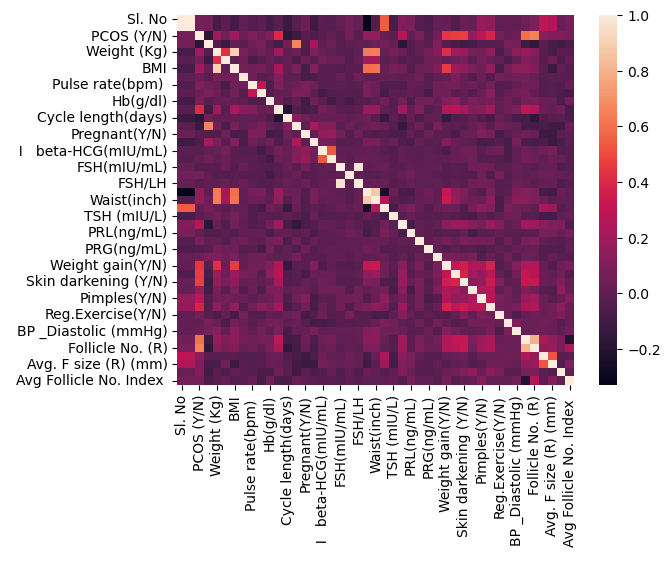

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

dataFile = pd.read_csv ('PCOS_data_without_infertilityV2.csv')

dataFile_hm = sns.heatmap(dataFile.corr(), annot = False)

In [2]:
dataFile = dataFile.dropna()

dataFile = dataFile.drop('Sl. No', axis = 1)
dataFile = dataFile.drop('Patient File No.', axis = 1)
dataFile = dataFile.drop('Follicle No. (L)', axis = 1)
dataFile = dataFile.drop('Follicle No. (R)', axis = 1)

x = dataFile.drop(columns = ['Avg Follicle No. Index ']).copy()
y = dataFile ['Avg Follicle No. Index ']

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

Root Mean Squared Error for the Test Dataset: 0.8453276916578316
Root Mean Squared Error for the Train Dataset: 0.774781421140681
R^2 for the Test Dataset for the Test Dataset: -0.022251617985553418
R^2 for the Train Dataset for the Train Dataset: 0.01230905036083263


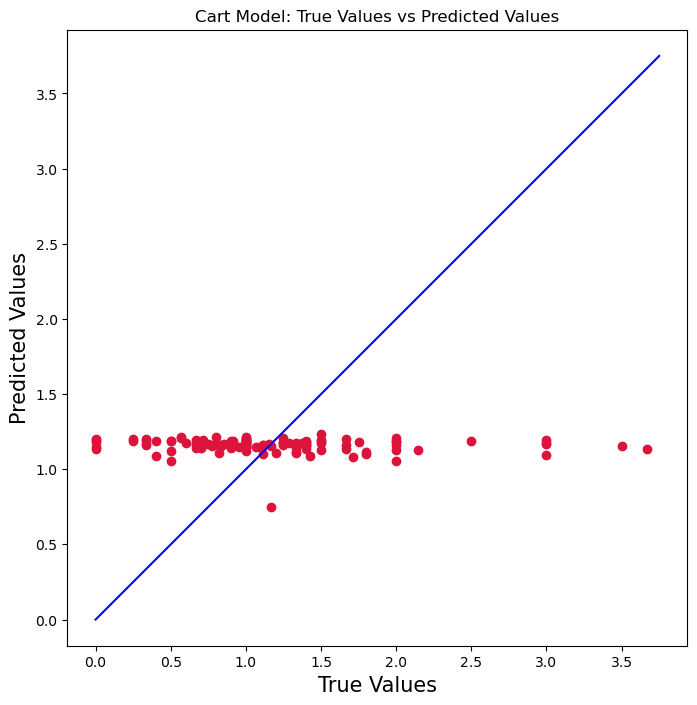

In [3]:
from sklearn import linear_model

elasticModel = linear_model.ElasticNet(alpha = 1, random_state =30, l1_ratio = 0.3)
elasticModel.fit(x_train, y_train)
elasticModelPrediction = elasticModel.predict (x_test)
elasticModelTrainPrediction = elasticModel.predict (x_train)

# Metrics

print ("Root Mean Squared Error for the Test Dataset:", math.sqrt (mean_squared_error(y_test, elasticModelPrediction, squared = False)))
print ("Root Mean Squared Error for the Train Dataset:", math.sqrt (mean_squared_error(y_train, elasticModelTrainPrediction, squared = False)))
print ("R^2 for the Test Dataset for the Test Dataset:", r2_score(y_test,elasticModelPrediction))
print ("R^2 for the Train Dataset for the Train Dataset:", r2_score(y_train,elasticModelTrainPrediction))

# Showcase Scatter Plot

plt.figure(figsize=(8,8))
plt.scatter(y_test, elasticModelPrediction, c='crimson') 

p1 = max(max(elasticModelTrainPrediction), max(y_train))
p2 = min(min(elasticModelTrainPrediction), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Cart Model: True Values vs Predicted Values") 
plt.axis('equal')
plt.show()